In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Install necessary packages

In [ ]:
# Install necessary packages (uncomment if you need to install these libraries)
!pip install wordcloud
!pip install nltk
!pip install gensim
!pip install vaderSentiment
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 20.8 MB/s eta 0:00:00


#1. Import Libraries and Load Dataset
  * Import required libraries: pandas (for data manipulation), matplotlib (for plotting), WordCloud (for visualization), nltk (for text processing), and vaderSentiment (for sentiment analysis).

  * Download stopwords and tokenizer data from NLTK.

  * Load the CSV file into a pandas DataFrame (HSRev) and ensure that the review text (HSRev_text) is non-null and cast to string.

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import string
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Load the dataset (update the file path if needed)
uploaded_file_name = '/content/drive/MyDrive/AmazonReviewsiphone14.csv'
HSRev = pd.read_csv(uploaded_file_name, encoding='ISO-8859-1')
HSRev_text = HSRev['text'].dropna().astype(str)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#2. Text Preprocessing
  * Define a function preprocess_text to clean the text: convert to lowercase, remove punctuation, tokenize the text, and remove stopwords.

  * Apply this function to each review in the dataset and store the cleaned reviews in HSRev_text_clean.

In [ ]:
# Preprocessing Text Data
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """Convert text to lowercase, remove punctuation, and stopwords."""
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = nltk.word_tokenize(text)  # Tokenize
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

# Apply preprocessing to each review
HSRev_text_clean = HSRev_text.apply(preprocess_text)

# 3. Word Cloud Generation
  * oncatenate all cleaned reviews into a single string (all_text).
  * Generate a word cloud based on the concatenated text.
  * Display the word cloud using matplotlib.

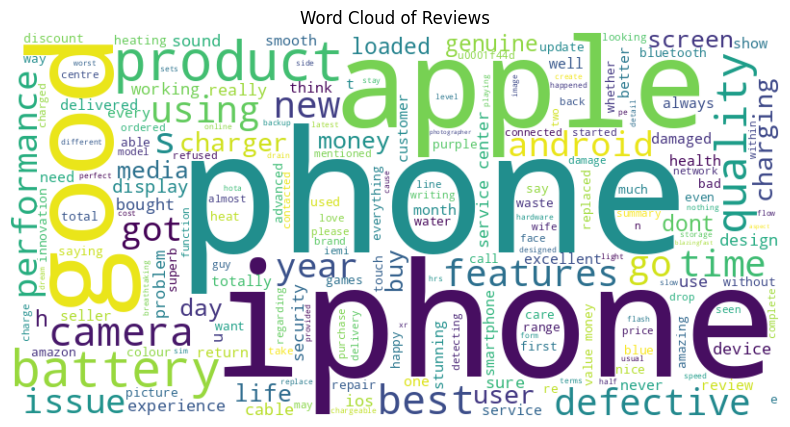

In [ ]:
# Word Cloud Generation
all_text = " ".join(HSRev_text_clean)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()


#4. Sentiment Analysis
* Initialize the SentimentIntensityAnalyzer from VADER.
* Apply the sentiment analysis to each cleaned review, which returns a dictionary with scores (e.g., positive, negative, neutral, and compound).
* Convert the list of sentiment results into a DataFrame (sentiment_df).

In [ ]:
# Step 3: Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()

# Analyze sentiment for each preprocessed review
HSRev_text_clean_sentiments = HSRev_text_clean.apply(lambda x: analyzer.polarity_scores(x))

# Convert sentiment results to DataFrame
sentiment_df = pd.DataFrame(HSRev_text_clean_sentiments.tolist())

#5.  Sentiment Classification
* Define a function classify_sentiment to classify the sentiment based on the compound score:

    Positive if compound >= 0.05

    Negative if compound <= -0.05
    
    Neutral if it's between -0.05 and 0.05.
* Apply this function to classify each review and store the result in a new column classification.

In [ ]:
# Classify sentiment based on compound score
def classify_sentiment(compound_score):
    """Classify sentiment based on compound score."""
    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

sentiment_df['classification'] = sentiment_df['compound'].apply(classify_sentiment)

#6. Display Sentiment and Reviews
* Create a new DataFrame HSRev_text_clean_sentiment with columns Review and Sentiment.
* Print all the reviews with their respective sentiment classification.

In [ ]:
# Step 4: Show reviews and their sentiment
HSRev_text_clean_sentiment = pd.DataFrame({'Review': HSRev_text_clean, 'Sentiment': sentiment_df['classification']})

# Display the sentiment classification for all reviews
print("\nAll Reviews with Sentiment Classification:")
print(HSRev_text_clean_sentiment)


All Reviews with Sentiment Classification:
                                               Review Sentiment
0   writing review nearly two years purchasing pho...  Positive
1           little heating issue seen using face time   Neutral
2   bought 59000 nice looking bought phone wife or...  Positive
3   added iphone 7 exchange 7k discount delivery g...  Positive
4        genuine product brand new u0001f44du0001f3fb   Neutral
..                                                ...       ...
95                                         good phone  Positive
96                                         camera wow   Neutral
97                           write iphone best always  Negative
98                                                 go       NaN
99                        defective product delivered       NaN

[100 rows x 2 columns]


#7. Sentiment Distribution
* Count the number of reviews that fall into each sentiment category (Positive, Neutral, Negative).
* Print the sentiment classification distribution.

In [ ]:
# Step 5: Sentiment Classification Distribution
sentiment_distribution = sentiment_df['classification'].value_counts()

# Print sentiment distribution
print("\nSentiment Classification Distribution:")
print(sentiment_distribution)


Sentiment Classification Distribution:
classification
Positive    62
Neutral     19
Negative    17
Name: count, dtype: int64


#8. Selecting a Specific Review
* Define a function select_review that accepts an index and displays the corresponding review and its sentiment.
* Allow the user to input the index of the review they want to see and call the function.

In [ ]:
# Function to select a specific review by index
def select_review(index):
    """Display a selected review and its sentiment classification based on its index."""
    if index >= 0 and index < len(HSRev_text_clean_sentiment):
        selected_review = HSRev_text_clean_sentiment.iloc[index]
        print(f"\nSelected Review: {selected_review['Review']}")
        print(f"Sentiment: {selected_review['Sentiment']}")
    else:
        print("Invalid index, please try again.")

# Allow the user to input an index to select a review
try:
    review_index = int(input("\nEnter the index of the review you'd like to see: "))
    select_review(review_index)
except ValueError:
    print("Please enter a valid number.")


Enter the index of the review you'd like to see: 45

Selected Review: android users using phone take time understand
Sentiment: Positive


#9. Custom Sentiment Classification
* Define a function custom_sentiment_analysis that takes user input, preprocesses the text, and performs sentiment analysis.
* Print the sentiment scores and classification for the custom input.
* Allow the user to input their own text and analyze its sentiment.

In [ ]:
# Step 6: Custom Sentiment Classification
def custom_sentiment_analysis(text):
    # Preprocess the text
    clean_text = preprocess_text(text)

    # Perform sentiment analysis using VADER
    sentiment_score = analyzer.polarity_scores(clean_text)

    # Classify sentiment based on compound score
    sentiment_class = classify_sentiment(sentiment_score['compound'])

    # Print the results
    print(f"\nCustom Input Sentiment Analysis Results for: '{text}'")
    print(f"Scores: {sentiment_score}")
    print(f"Sentiment Classification: {sentiment_class}")

# Allow the user to input custom text for sentiment analysis
custom_text = input("\nEnter your own text to classify its sentiment: ")
custom_sentiment_analysis(custom_text)


Enter your own text to classify its sentiment: i like it

Custom Input Sentiment Analysis Results for: 'i like it'
Scores: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3612}
Sentiment Classification: Positive
